In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from census import Census
from scipy.stats import linregress
import numpy as np

# Census API Key
from config import api_key
c = Census(api_key, year = 2013)


In [2]:
# Store filepath in a variable
gun_file = "Resources/gun-violence-data_01-2013_03-2018.csv"

In [3]:
# Read our data file with the pandas library
gun_file_df = pd.read_csv(gun_file)
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
# Create a new series for just the year
gun_file_df["year"] = pd.DatetimeIndex(gun_file_df["date"]).year
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013


In [5]:
# Group dataframe by state
grouped_states = gun_file_df.groupby(["state"])
number_of_incidents = grouped_states.count()
incidents = number_of_incidents["incident_id"]
incidents.head()

state
Alabama        5471
Alaska         1349
Arizona        2328
Arkansas       2842
California    16306
Name: incident_id, dtype: int64

In [6]:
# Find the total number killed by state
sum_of_deaths = grouped_states["n_killed"].sum()
sum_of_deaths.head()

state
Alabama       1880
Alaska         267
Arizona       1094
Arkansas       773
California    5562
Name: n_killed, dtype: int64

In [7]:
# Create a new dataframe
state_summary = pd.DataFrame({"Number of Incidents" : incidents,
                             "Number of Deaths" : sum_of_deaths})
#state_summary = state_summary.reset_index(drop=True)
state_summary.head()

,Number of Deaths,Number of Incidents
state,,
Alabama,1880,5471
Alaska,267,1349
Arizona,1094,2328
Arkansas,773,2842
California,5562,16306


In [8]:
# Add state as a column
state_summary["state"] = state_summary.index
state_summary

,Number of Deaths,Number of Incidents,state
state,,,
Alabama,1880,5471,Alabama
Alaska,267,1349,Alaska
Arizona,1094,2328,Arizona
Arkansas,773,2842,Arkansas
California,5562,16306,California
Colorado,796,3201,Colorado
Connecticut,341,3067,Connecticut
Delaware,217,1685,Delaware
District of Columbia,459,3195,District of Columbia


In [9]:
# Reset index
state_summary = state_summary.reset_index(drop=True)
state_summary

,Number of Deaths,Number of Incidents,state
0,1880,5471,Alabama
1,267,1349,Alaska
2,1094,2328,Arizona
3,773,2842,Arkansas
4,5562,16306,California
5,796,3201,Colorado
6,341,3067,Connecticut
7,217,1685,Delaware
8,459,3195,District of Columbia
9,3909,15029,Florida


In [10]:
# Rename state column to state name
state_summary = state_summary.rename(columns ={"state" : "State_Name"})
state_summary

,Number of Deaths,Number of Incidents,State_Name
0,1880,5471,Alabama
1,267,1349,Alaska
2,1094,2328,Arizona
3,773,2842,Arkansas
4,5562,16306,California
5,796,3201,Colorado
6,341,3067,Connecticut
7,217,1685,Delaware
8,459,3195,District of Columbia
9,3909,15029,Florida


In [11]:
# Look at gun violence over time to show there is a need to study this
# Group dataframe by year

grouped_years = gun_file_df.groupby(["year"])
incidents_in_years = grouped_years.count()
incidents_years = incidents_in_years["incident_id"]
incidents_years



year
2013      278
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: incident_id, dtype: int64

In [12]:
# Find the total number killed by year
sum_of_deaths_year = grouped_years["n_killed"].sum()
sum_of_deaths_year

year
2013      317
2014    12557
2015    13484
2016    15066
2017    15511
2018     3533
Name: n_killed, dtype: int64

In [13]:
# Create a new dataframe with years
year_df = pd.DataFrame({
                        "Number of Incidents" : incidents_years,
                        "Number of Deaths": sum_of_deaths_year})
year_df

,Number of Deaths,Number of Incidents
year,,
2013,317,278
2014,12557,51854
2015,13484,53579
2016,15066,58763
2017,15511,61401
2018,3533,13802


In [14]:
# Add year as a column
year_df["Year"] = year_df.index
year_df

,Number of Deaths,Number of Incidents,Year
year,,,
2013,317,278,2013
2014,12557,51854,2014
2015,13484,53579,2015
2016,15066,58763,2016
2017,15511,61401,2017
2018,3533,13802,2018


In [15]:
# Reset index
year_df = year_df.reset_index(drop=True)
year_df

,Number of Deaths,Number of Incidents,Year
0,317,278,2013
1,12557,51854,2014
2,13484,53579,2015
3,15066,58763,2016
4,15511,61401,2017
5,3533,13802,2018


In [16]:
# Drop 2013 and 2018 for the purpose of the line graph
only_few_years = year_df.drop([0,5])

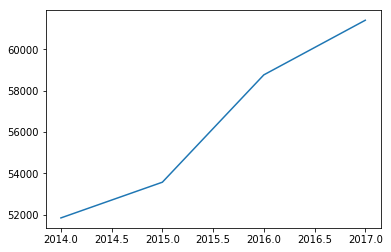

In [17]:
# Create a line plot 
x_axis = only_few_years["Year"]
y_axis_incidents = only_few_years["Number of Incidents"]
y_axis_deaths = only_few_years["Number of Deaths"]

plt.plot(x_axis, y_axis_incidents)





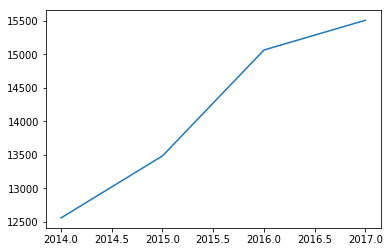

In [18]:
# Take the population divided by number of instances
plt.plot(x_axis, y_axis_deaths)

In [19]:
# Create a stacked bar plot for states with incidents and deaths
# population divided by incidents
                      

In [20]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "State_Name"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State_Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head()

,State_Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [21]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data_states.csv", encoding="utf-8", index=False)

In [22]:
# Store filepath in a variable
gun_law = "Resources/Gun Law Strictness.xlsx"
gun_school = "Resources/Total School Expenditures by State.xlsx"
gun_mental = "Resources/Mental Health Expenditure by State.xlsx"
gun_raw = "Resources/raw_data.xlsx"

In [23]:
# Read our data file with the pandas library
gun_law_df = pd.read_excel(gun_law)
gun_school_df = pd.read_excel(gun_school)
gun_mental_df = pd.read_excel(gun_mental)
gun_raw_df = pd.read_excel(gun_raw)

gun_mental_df.head()

,state,tota_expenditure,expenditure_per_capita,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank
0,Alabama,373100000,78.19,37,327.57,40
1,Alaska,214200700,310.01,3,1785.01,2
2,Arizona,1414300000,221.27,7,827.56,15
3,Arkansas,122468795,42.02,48,169.39,50
4,California,5674396088,152.60,15,645.55,22


In [24]:
gun_law_df.head()

,gun law strengh (rank),state,grade (2017),gun death rate (rank),gun death rate (rank per 100k)
0,1,California,A,43,7.9
1,2,New Jersey,A-,45,5.5
2,3,Connecticut,A-,46,4.6
3,4,Massachusetts,A-,50,3.4
4,5,New York,A-,48,4.4


In [25]:
gun_school_df.head()

,state,total_spending,total_per_pupil
0,Alabama,6826622000,9128
1,Alaska,2646225000,20172
2,Arizona,7205417000,7489
3,Arkansas,4683434000,9694
4,California,66208111000,10467


In [26]:
gun_raw_df.head()

,state,year,lawtotal
0,Alabama,2017,10
1,Alaska,2017,4
2,Arizona,2017,11
3,Arkansas,2017,11
4,California,2017,106


In [27]:
merge1 = gun_raw_df.merge(gun_school_df, how='outer', on='state')
merge1.head()

,state,year,lawtotal,total_spending,total_per_pupil
0,Alabama,2017.0,10.0,6826622000,9128
1,Alaska,2017.0,4.0,2646225000,20172
2,Arizona,2017.0,11.0,7205417000,7489
3,Arkansas,2017.0,11.0,4683434000,9694
4,California,2017.0,106.0,66208111000,10467


In [28]:
merge2 = merge1.merge(gun_law_df, how='outer', on='state')
merge2.head()

,state,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k)
0,Alabama,2017.0,10.0,6826622000,9128,36.0,F,2.0,21.4
1,Alaska,2017.0,4.0,2646225000,20172,44.0,F,1.0,23.0
2,Arizona,2017.0,11.0,7205417000,7489,47.0,F,16.0,15.2
3,Arkansas,2017.0,11.0,4683434000,9694,39.0,F,9.0,17.7
4,California,2017.0,106.0,66208111000,10467,1.0,A,43.0,7.9


In [29]:
gun_dataframe = merge2.merge(gun_mental_df, how='outer', on='state')

gun_dataframe = gun_dataframe.rename(columns={"state": "State_Name"
                                      })


gun_dataframe

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),tota_expenditure,expenditure_per_capita,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank
0,Alabama,2017.0,10.0,6826622000,9128,36.0,F,2.0,21.4,373100000,78.19,37,327.57,40
1,Alaska,2017.0,4.0,2646225000,20172,44.0,F,1.0,23.0,214200700,310.01,3,1785.01,2
2,Arizona,2017.0,11.0,7205417000,7489,47.0,F,16.0,15.2,1414300000,221.27,7,827.56,15
3,Arkansas,2017.0,11.0,4683434000,9694,39.0,F,9.0,17.7,122468795,42.02,48,169.39,50
4,California,2017.0,106.0,66208111000,10467,1.0,A,43.0,7.9,5674396088,152.60,15,645.55,22
5,Colorado,2017.0,30.0,8146683000,9245,15.0,C,20.0,14.3,443227875,88.41,31,517.79,28
6,Connecticut,2017.0,89.0,9603117000,18377,3.0,A-,46.0,4.6,675500000,189.34,9,1659.71,3
7,Delaware,2017.0,40.0,1779087000,14120,11.0,B,37.0,10.9,95000125,106.04,26,605.10,24
8,Florida,2017.0,21.0,24933433000,8881,26.0,F,26.0,12.6,742227938,39.55,49,178.81,47
9,Georgia,2017.0,6.0,16401832000,9427,32.0,F,17.0,14.9,449147633,46.54,47,177.81,48


In [30]:
gun_census_df = gun_dataframe.merge(census_pd, how='outer', on='State_Name')
gun_census_df.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),tota_expenditure,...,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,3.731000e+08,...,37.0,327.57,40.0,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,2.142007e+08,...,3.0,1785.01,2.0,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,1.414300e+09,...,7.0,827.56,15.0,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,1.224688e+08,...,48.0,169.39,50.0,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,5.674396e+09,...,15.0,645.55,22.0,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [31]:
gun_census = gun_census_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
gun_census.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),tota_expenditure,...,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,3.731000e+08,...,37.0,327.57,40.0,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,2.142007e+08,...,3.0,1785.01,2.0,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,1.414300e+09,...,7.0,827.56,15.0,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,1.224688e+08,...,48.0,169.39,50.0,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,5.674396e+09,...,15.0,645.55,22.0,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [32]:
# Merge gun_census with state_summary on State_Name
gun_census_deaths = gun_census.merge(state_summary, how = 'outer', on = 'State_Name')
gun_census_deaths.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),tota_expenditure,...,poverty_per_capita_rank,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Number of Deaths,Number of Incidents
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,3.731000e+08,...,40.0,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968,1880,5471
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,2.142007e+08,...,2.0,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854,267,1349
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,1.414300e+09,...,15.0,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323,1094,2328
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,1.224688e+08,...,50.0,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961,773,2842
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,5.674396e+09,...,22.0,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662,5562,16306


In [33]:
# Drop DC because we don't have a lot of data for it
gun_census_deaths.drop([50])
gun_census_deaths["Pop in 100k"] = gun_census_deaths["Population"]/100000
gun_census_deaths["Norm Incidents"] = gun_census_deaths["Number of Incidents"]/gun_census_deaths["Pop in 100k"]


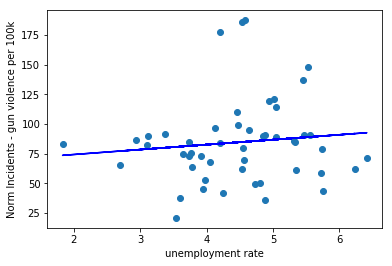

In [34]:
#unemployment rate vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["Unemployment Rate"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("unemployment rate")
ax.set_ylabel("Norm Incidents - gun violence per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

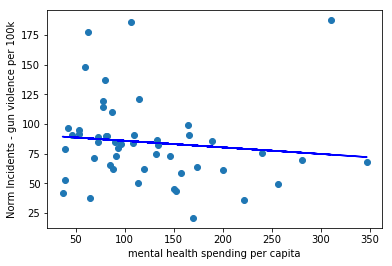

In [35]:
#mental health spending per capita vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["expenditure_per_capita"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("mental health spending per capita")
ax.set_ylabel("Norm Incidents - gun violence per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

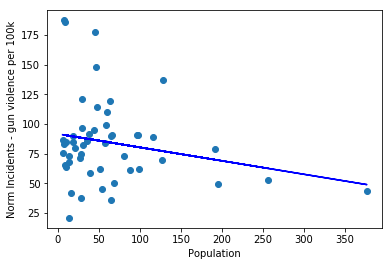

In [36]:
#population vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["Population"]/100000)
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Population")
ax.set_ylabel("Norm Incidents - gun violence per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

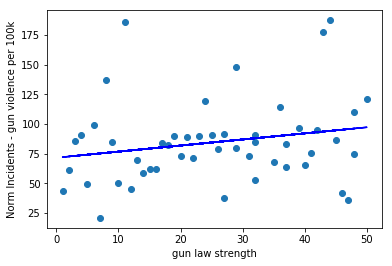

In [37]:
#gun law strength vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["gun law strengh (rank)"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("gun law strength")
ax.set_ylabel("Norm Incidents - gun violence per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

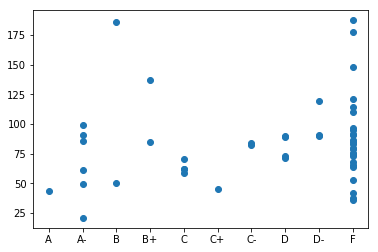

In [38]:
y_axis = gun_census_deaths["Norm Incidents"]
x_axis = gun_census_deaths["grade (2017)"]

plt.scatter(x_axis, y_axis)

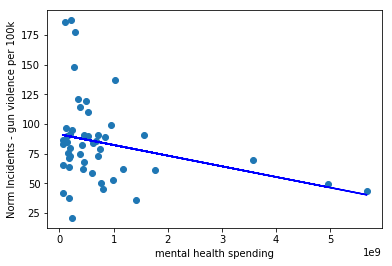

In [39]:
#mental health spending vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["tota_expenditure"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("mental health spending")
ax.set_ylabel("Norm Incidents - gun violence per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

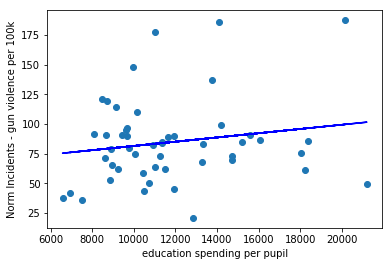

In [40]:
#education spending per pupil vs gun incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["total_per_pupil"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("education spending per pupil")
ax.set_ylabel("Norm Incidents - gun violence per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

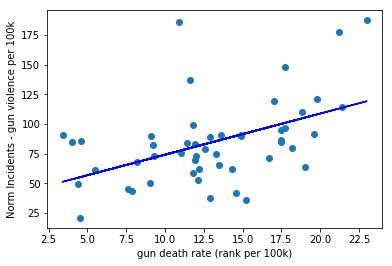

In [41]:
#gun death rate (rank)
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["gun death rate (rank per 100k)"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("gun death rate (rank per 100k)")
ax.set_ylabel("Norm Incidents - gun violence per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')


In [42]:


gun_census_deaths_disp = gun_census_deaths[["State_Name","Number of Incidents","Population","Norm Incidents","Pop in 100k"]]

gun_census_deaths_disp1=gun_census_deaths_disp.sort_values("Norm Incidents",ascending=False)

gun_census_deaths_disp1.head()

,State_Name,Number of Incidents,Population,Norm Incidents,Pop in 100k
1,Alaska,1349,720316.0,187.278916,7.20316
7,Delaware,1685,908446.0,185.481581,9.08446
17,Louisiana,8103,4567968.0,177.387407,45.67968
39,South Carolina,6939,4679602.0,148.281841,46.79602
12,Illinois,17556,12848554.0,136.637944,128.48554


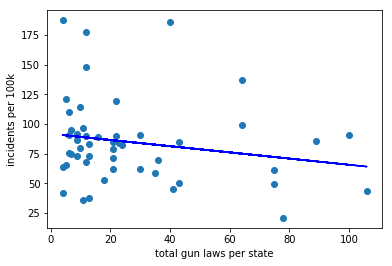

In [43]:
#total gun laws per state vs incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["lawtotal"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("total gun laws per state")
ax.set_ylabel("incidents per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

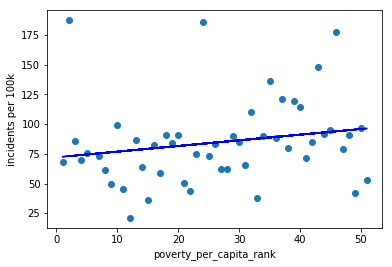

In [44]:
#poverty_per_capita_rank vs incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["poverty_per_capita_rank"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("poverty_per_capita_rank")
ax.set_ylabel("incidents per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

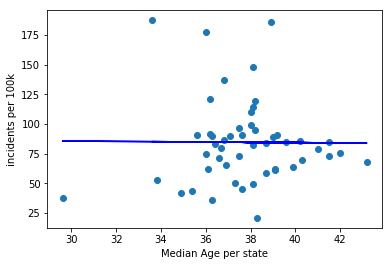

In [45]:
#Median Age per state vs incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["Median Age"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Median Age per state")
ax.set_ylabel("incidents per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

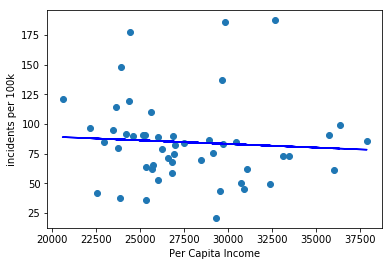

In [46]:
#Per Capita Income per state vs incidents per 100k
gun_census_deaths = gun_census_deaths.dropna()
x_axis = np.array(gun_census_deaths["Per Capita Income"])
y_axis = gun_census_deaths["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Per Capita Income")
ax.set_ylabel("incidents per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

In [47]:
# Store filepath in a variable
gun_onwership_by_state = "Resources/GunsByState.xlsx"

In [48]:
gun_ownership_by_state_df = pd.read_excel(gun_onwership_by_state)

gun_ownership_by_state_df.head()

,State_Name,Gun ownership rates
0,Alabama,48.9
1,Alaska,61.7
2,Arizona,32.3
3,Arkansas,57.9
4,California,20.1


In [49]:
# Merge gun_census with gun ownership by state
gun_census_deaths_owner = gun_census_deaths.merge(gun_ownership_by_state_df, how = 'outer', on = 'State_Name')
gun_census_deaths_owner.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),tota_expenditure,...,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Number of Deaths,Number of Incidents,Pop in 100k,Norm Incidents,Gun ownership rates
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,3.731000e+08,...,43253.0,23680.0,870631.0,18.140878,5.040968,1880,5471,47.99277,113.996337,48.9
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,2.142007e+08,...,70760.0,32651.0,69514.0,9.650487,4.572854,267,1349,7.20316,187.278916,61.7
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,1.414300e+09,...,49774.0,25358.0,1131901.0,17.468409,4.882323,1094,2328,64.79703,35.927573,32.3
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,1.224688e+08,...,40768.0,22170.0,547328.0,18.658682,4.132961,773,2842,29.33369,96.885186,57.9
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,5.674396e+09,...,61094.0,29527.0,5885417.0,15.628107,5.758662,5562,16306,376.59181,43.298870,20.1


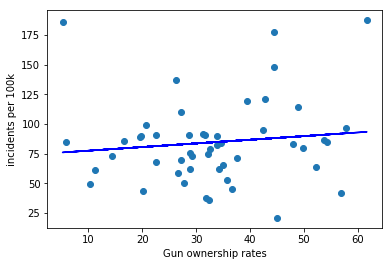

In [50]:
#Gun ownership rates per state vs incidents per 100k
gun_census_deaths_owner = gun_census_deaths_owner.dropna()
x_axis = np.array(gun_census_deaths_owner["Gun ownership rates"])
y_axis = gun_census_deaths_owner["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("Gun ownership rates")
ax.set_ylabel("incidents per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')

In [54]:
# Store filepath in a variable
police_spending_by_state = "Resources/PoliceExpenditureByState.xlsx"

In [55]:
police_spending_by_state_df = pd.read_excel(police_spending_by_state)

police_spending_by_state_df.head()

,State_Name,PoliceExpenditurePerCapita
0,Alabama,38.15
1,Alaska,219.55
2,Arizona,36.51
3,Arkansas,39.65
4,California,45.92


In [56]:
# Merge gun_census with gun ownership by state
gun_census_deaths_owner_police = gun_census_deaths_owner.merge(police_spending_by_state_df, how = 'outer', on = 'State_Name')
gun_census_deaths_owner_police.head()

,State_Name,year,lawtotal,total_spending,total_per_pupil,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),tota_expenditure,...,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Number of Deaths,Number of Incidents,Pop in 100k,Norm Incidents,Gun ownership rates,PoliceExpenditurePerCapita
0,Alabama,2017.0,10.0,6.826622e+09,9128.0,36.0,F,2.0,21.4,3.731000e+08,...,23680.0,870631.0,18.140878,5.040968,1880,5471,47.99277,113.996337,48.9,38.15
1,Alaska,2017.0,4.0,2.646225e+09,20172.0,44.0,F,1.0,23.0,2.142007e+08,...,32651.0,69514.0,9.650487,4.572854,267,1349,7.20316,187.278916,61.7,219.55
2,Arizona,2017.0,11.0,7.205417e+09,7489.0,47.0,F,16.0,15.2,1.414300e+09,...,25358.0,1131901.0,17.468409,4.882323,1094,2328,64.79703,35.927573,32.3,36.51
3,Arkansas,2017.0,11.0,4.683434e+09,9694.0,39.0,F,9.0,17.7,1.224688e+08,...,22170.0,547328.0,18.658682,4.132961,773,2842,29.33369,96.885186,57.9,39.65
4,California,2017.0,106.0,6.620811e+10,10467.0,1.0,A,43.0,7.9,5.674396e+09,...,29527.0,5885417.0,15.628107,5.758662,5562,16306,376.59181,43.298870,20.1,45.92


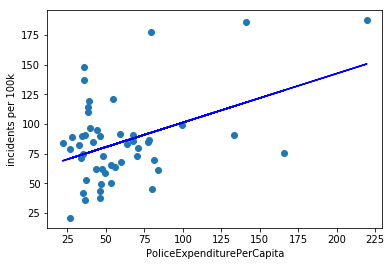

In [58]:
#Police expenditure per capita per state vs incidents per 100k per state
gun_census_deaths_owner_police = gun_census_deaths_owner_police.dropna()
x_axis = np.array(gun_census_deaths_owner_police["PoliceExpenditurePerCapita"])
y_axis = gun_census_deaths_owner_police["Norm Incidents"]

y_axis.tolist()
(slope, intercept, _, _, _) = linregress(x_axis, y_axis.tolist())

slope

fit = slope * x_axis + intercept
fit
fig, ax = plt.subplots()


ax.set_xlabel("PoliceExpenditurePerCapita")
ax.set_ylabel("incidents per 100k")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'blue')